In [42]:
import csv
import numpy as np
import matplotlib.pyplot as plt
 
 
def loadCSV(filename):
    '''
    function to load dataset
    '''
    with open(filename,"r") as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for i in range(len(dataset)):
            dataset[i] = [float(x) for x in dataset[i]]     
    return np.array(dataset)

In [43]:
def normalize(X):
    '''
    function to normalize feature matrix, X
    '''
    mins = np.min(X, axis = 0)
    maxs = np.max(X, axis = 0)
    rng = maxs - mins
    norm_X = 1 - ((maxs - X)/rng)
    return norm_X

In [44]:
def logistic_func(beta, X):
    '''
    logistic(sigmoid) function
    '''
    return 1.0/(1 + np.exp(-np.dot(X, beta.T)))
 
 
def log_gradient(beta, X, y):
    '''
    logistic gradient function
    '''
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1)
    final_calc = np.dot(first_calc.T, X)
    return final_calc
 
 
def cost_func(beta, X, y):
    '''
    cost function, J
    '''
    log_func_v = logistic_func(beta, X)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1 - y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)

In [45]:
def grad_desc(X, y, beta, lr=.01, converge_change=.001):
    '''
    gradient descent function
    '''
    cost = cost_func(beta, X, y)
    change_cost = 1
    num_iter = 1
     
    while(change_cost > converge_change):
        old_cost = cost
        beta = beta - (lr * log_gradient(beta, X, y))
        cost = cost_func(beta, X, y)
        change_cost = old_cost - cost
        num_iter += 1
     
    return beta, num_iter 
 
 
def pred_values(beta, X):
    '''
    function to predict labels
    '''
    pred_prob = logistic_func(beta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    return np.squeeze(pred_value)

In [46]:
def plot_reg(X, y, beta):
    '''
    function to plot decision boundary
    '''
    # labelled observations
    x_0 = X[np.where(y == 0.0)]
    x_1 = X[np.where(y == 1.0)]
     
    # plotting points with diff color for diff label
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0')
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1')
     
    # plotting decision boundary
    x1 = np.arange(0, 1, 0.1)
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2]
    plt.plot(x1, x2, c='k', label='reg line')
 
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

Estimated regression coefficients: [[-0.1922798   0.92920793 -0.92580837]]
No. of iterations: 144
Correctly predicted labels: 57


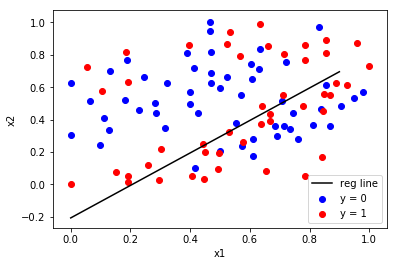

In [47]:
if __name__ == "__main__":
    # load the dataset
    dataset = loadCSV('dataset1.csv')
     
    # normalizing feature matrix
    X = normalize(dataset[:, :-1])
     
    # stacking columns wth all ones in feature matrix
    X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))
 
    # response vector
    y = dataset[:, -1]
 
    # initial beta values
    beta = np.matrix(np.zeros(X.shape[1]))
 
    # beta values after running gradient descent
    beta, num_iter = grad_desc(X, y, beta)
 
    # estimated beta values and number of iterations
    print("Estimated regression coefficients:", beta)
    print("No. of iterations:", num_iter)
 
    # predicted labels
    y_pred = pred_values(beta, X)
     
    # number of correctly predicted labels
    print("Correctly predicted labels:", np.sum(y == y_pred))
    
    #percentage accuracy of prediction
    
    p=sum(y_pred)
     
    # plotting regression line
    plot_reg(X, y, beta)

Logistic Regression model accuracy(in %): 95.6884561892


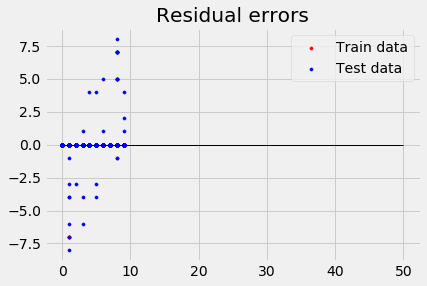

In [53]:
from sklearn import datasets, linear_model, metrics
  
# load the digit dataset
digits = datasets.load_digits()
  
# defining feature matrix(X) and response vector(y)
X = digits.data
y = digits.target
 
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
  
# create logistic regression object
reg = linear_model.LogisticRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)

# making pr
 
# making predictions on the testing set
y_pred = reg.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):", 
metrics.accuracy_score(y_test, y_pred)*100)


